In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Шаг 1. Подготовка данных

In [3]:
data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Прошлый датасет был без потерь, этот же...Посмотрим дупликаты

In [5]:
data.duplicated().sum()

0

Посмотрим на уникальные значения в списках

In [6]:
for col in data.columns:
    print(col, data[col].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

# Шаг 2. Обработка данных

In [7]:
data['Age'].median()
data['Age'].fillna(data['Age'].median(), inplace = True)
data.isnull().sum()

/tmp/ipykernel_36/3185392190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace = True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [9]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isnull().sum()

/tmp/ipykernel_36/3631949386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
data.drop(columns=['Cabin'], inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Шаг 2.1 Построение графиков **Exploratory Data Analysis (EDA)**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

**Зависимость пола от выживаемости**

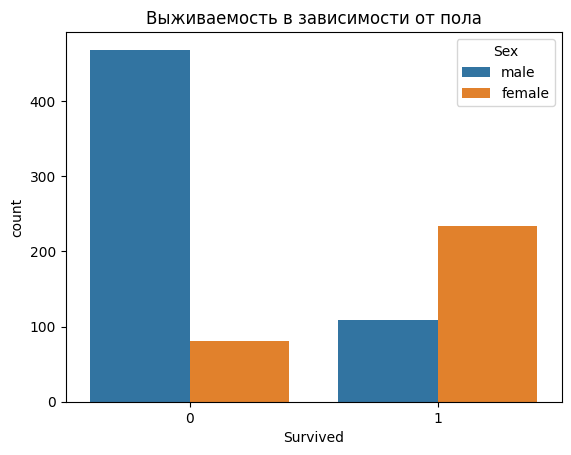

In [13]:
sns.countplot(data=data, x='Survived', hue='Sex')
plt.title('Выживаемость в зависимости от пола')
plt.show()

**Зависимость возраста от выживаемости**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


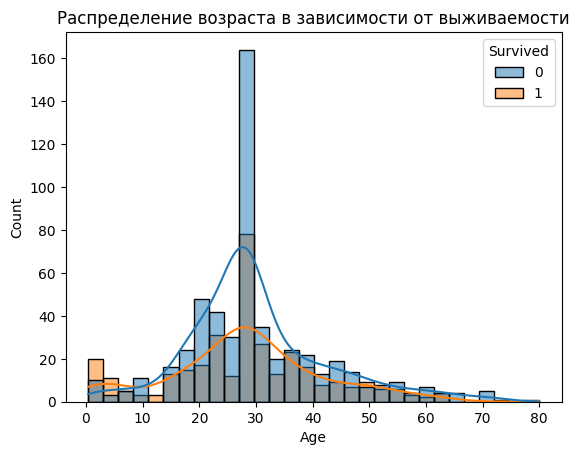

In [14]:
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Распределение возраста в зависимости от выживаемости')
plt.show()


**Зависимость класса билета (Pclass) от выживаемости**

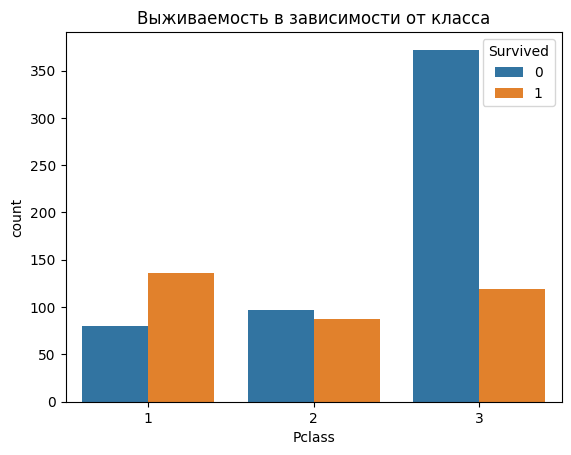

In [15]:
sns.countplot(data=data, x = 'Pclass', hue = 'Survived')
plt.title('Выживаемость в зависимости от класса')
plt.show()

**Выживаемость в зависимости от порта посадки**

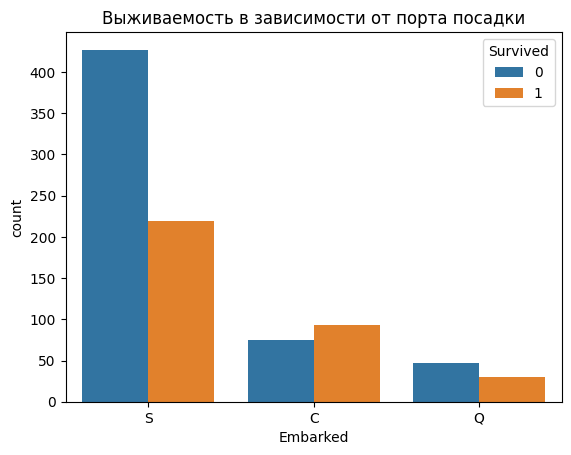

In [16]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title('Выживаемость в зависимости от порта посадки')
plt.show()

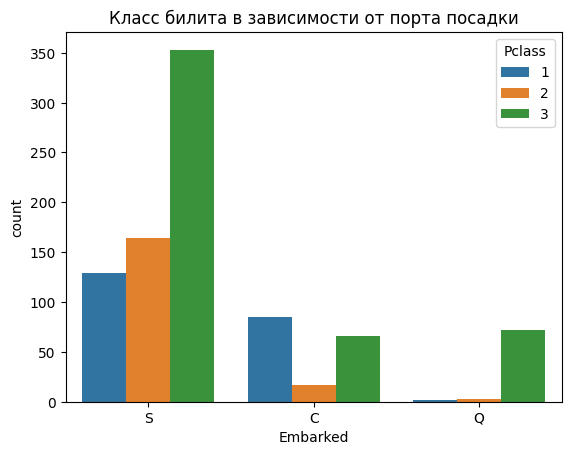

In [17]:
sns.countplot(data=data, x='Embarked', hue='Pclass')
plt.title('Класс билита в зависимости от порта посадки')
plt.show()

**Корреляция между различными числовыми переменными**

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
data_corr = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
data_corr['Sex'] = data_corr['Sex'].map({'male': 0, 'female': 1})
data_corr.head()

/tmp/ipykernel_36/2898295941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['Sex'] = data_corr['Sex'].map({'male': 0, 'female': 1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [20]:
data_corr.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

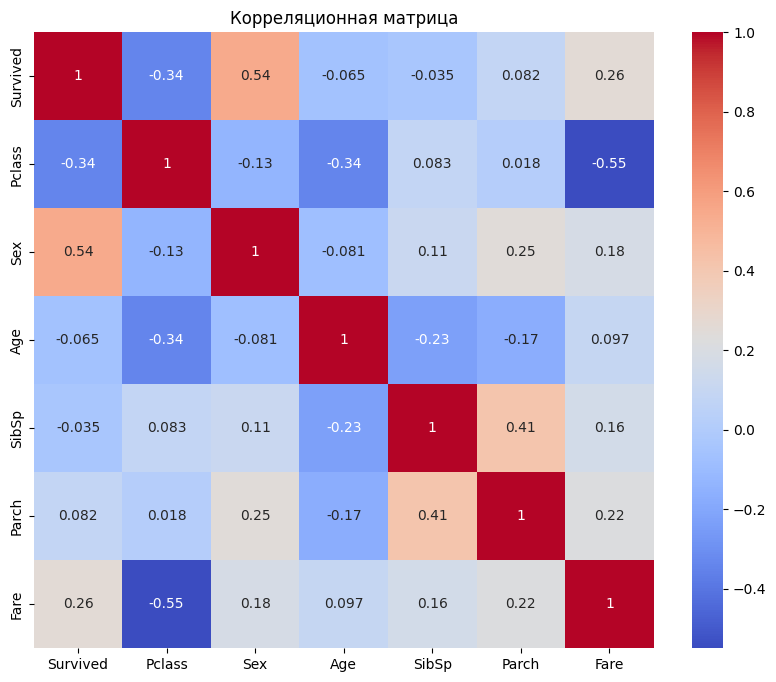

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


**Взаимосвязь семейного статуса и класса билета с выживаемостью**

Это многомерный анализ, который может показать, как размер семьи и класс билета одновременно влияют на выживаемость.

/tmp/ipykernel_36/2268531594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['FamilySize'] = data_corr['SibSp'] + data_corr['Parch']


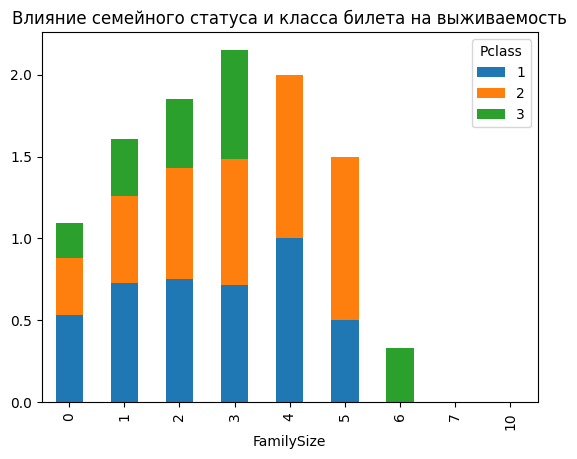

In [22]:
data_corr['FamilySize'] = data_corr['SibSp'] + data_corr['Parch']
pd.crosstab(data_corr['FamilySize'], data_corr['Pclass'], values=data_corr['Survived'], aggfunc='mean').plot(kind='bar', stacked=True)
plt.title('Влияние семейного статуса и класса билета на выживаемость')
plt.show()

# Шаг 3: Преобразование категориальных данных для обучения

In [23]:
data_corr = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data_corr['Sex'] = data_corr['Sex'].map({'male': 0, 'female': 1})

data_corr = pd.get_dummies(data_corr, columns=['Embarked'], prefix='Port')
data_corr.head()

/tmp/ipykernel_36/4151460414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['Sex'] = data_corr['Sex'].map({'male': 0, 'female': 1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [24]:
data_corr.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Port_C      0
Port_Q      0
Port_S      0
dtype: int64

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
X = data_corr.drop(columns=['Survived'])
y = data_corr['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормализуем числовые данные (стандартизация)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Шаг 4: Классификация

Теперь попробуем различные алгоритмы:

**1. Логистическая регрессия:**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy логистической регрессии: {accuracy_logreg}')


Accuracy логистической регрессии: 0.8097014925373134


/tmp/ipykernel_36/1445619382.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_36/1445619382.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

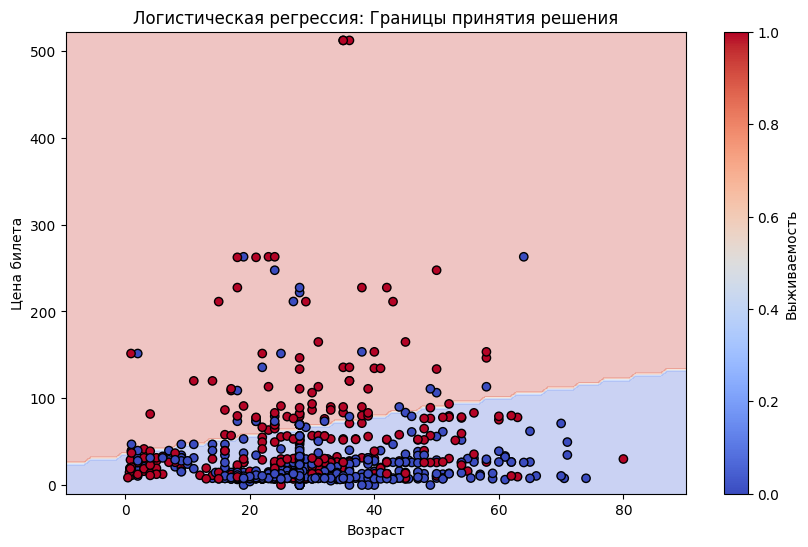

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Загрузим набор данных и подготовим его
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

# Предобработка данных
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

# Выбираем два признака для визуализации
X = df[['Age', 'Fare']]
y = df['Survived']
# X = data_corr.drop(columns=['Survived'])
# y = data_corr['Survived']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучим логистическую регрессию
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Создадим сетку для предсказаний
x_min, x_max = X['Age'].min() - 10, X['Age'].max() + 10
y_min, y_max = X['Fare'].min() - 10, X['Fare'].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Предсказания по сетке
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построим график
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['Age'], X['Fare'], c=y, edgecolors='k', cmap='coolwarm', marker='o')
plt.title('Логистическая регрессия: Границы принятия решения')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.colorbar(label='Выживаемость')
plt.show()

**2. Дерево решений:**

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy дерева решений: {accuracy_tree}')

Accuracy дерева решений: 0.6455223880597015


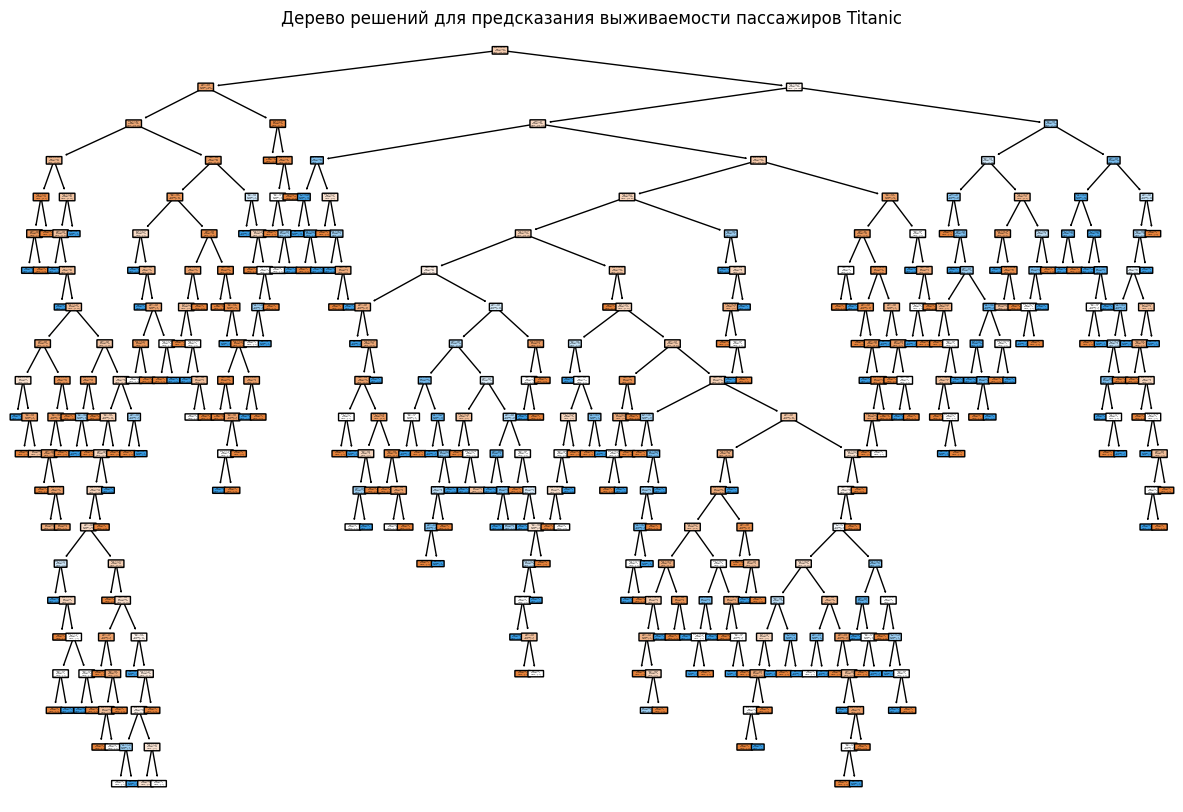

In [30]:
# Построим график дерева решений
plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title('Дерево решений для предсказания выживаемости пассажиров Titanic')
plt.show()

**3. Метод опорных векторов (SVM):**

In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy SVM: {accuracy_svc}')

Accuracy SVM: 0.6529850746268657


/tmp/ipykernel_36/898784510.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_36/898784510.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

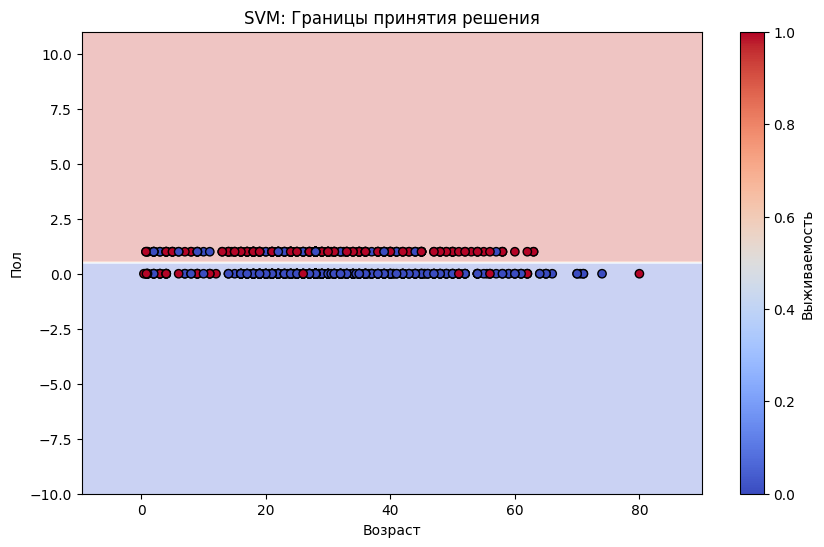

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Загрузим набор данных и подготовим его
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

# Предобработка данных
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

# Выбираем два признака для визуализации
X = df[['Age', 'Sex']]
y = df['Survived']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучим модель SVM
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# Создаем сетку для предсказаний
x_min, x_max = X['Age'].min() - 10, X['Age'].max() + 10
y_min, y_max = X['Sex'].min() - 10, X['Sex'].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Предсказания по сетке
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построим график
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['Age'], X['Sex'], c=y, edgecolors='k', cmap='coolwarm', marker='o')
plt.title('SVM: Границы принятия решения')
plt.xlabel('Возраст')
plt.ylabel('Пол')
plt.colorbar(label='Выживаемость')
plt.show()


**4. K-ближайших соседей (KNN):**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy KNN: {accuracy_knn}')

Accuracy KNN: 0.7238805970149254


/tmp/ipykernel_36/1051436683.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_36/1051436683.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

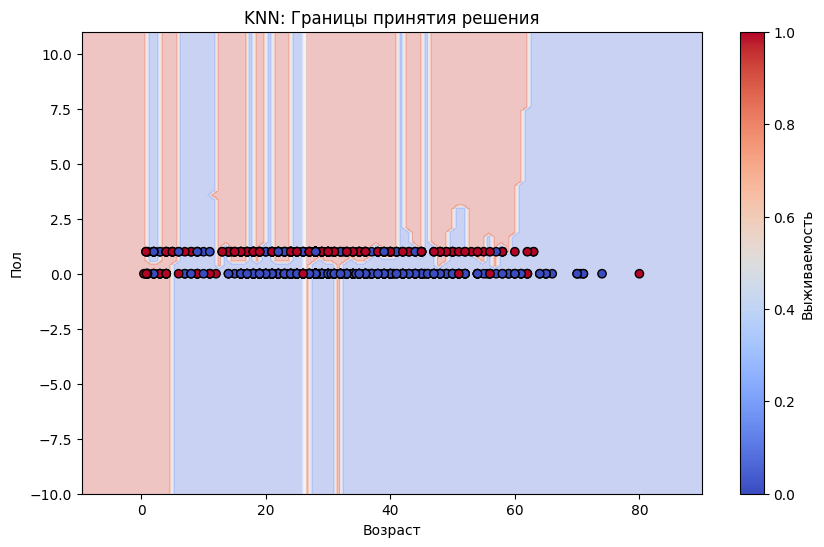

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Загрузим набор данных и подготовим его
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

# Предобработка данных
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

# Выбираем два признака для визуализации
X = df[['Age', 'Sex']]
y = df['Survived']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучим модель KNN
knn = KNeighborsClassifier(n_neighbors=6)  # Выбираем количество соседей
knn.fit(X_train, y_train)

# Создаем сетку для предсказаний
x_min, x_max = X['Age'].min() - 10, X['Age'].max() + 10
y_min, y_max = X['Sex'].min() - 10, X['Sex'].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Предсказания по сетке
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построим график
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X['Age'], X['Sex'], c=y, edgecolors='k', cmap='coolwarm', marker='o')
plt.title('KNN: Границы принятия решения')
plt.xlabel('Возраст')
plt.ylabel('Пол')
plt.colorbar(label='Выживаемость')
plt.show()


**5. Случайный лес:**

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy случайного леса: {accuracy_rf}')

Accuracy случайного леса: 0.7761194029850746


**Важность признаков:**

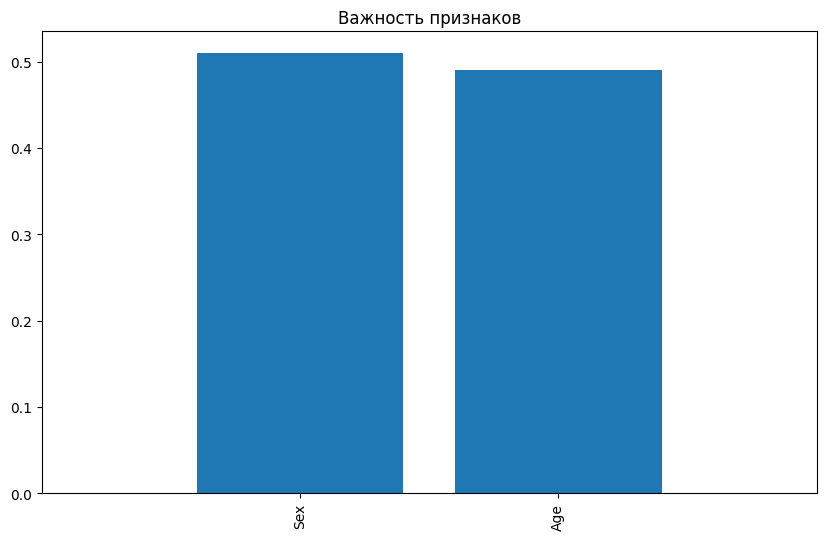

In [36]:
# Визуализация важности признаков
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Важность признаков')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

**ROC-кривая:**

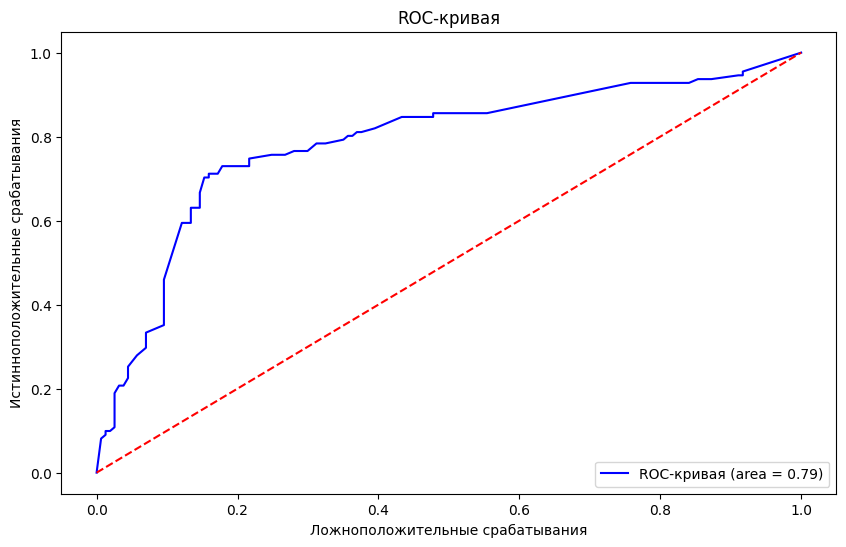

In [37]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей
y_probs = rf.predict_proba(X_test)[:, 1]

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Ложноположительные срабатывания')
plt.ylabel('Истинноположительные срабатывания')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

**Матрица путаницы:**

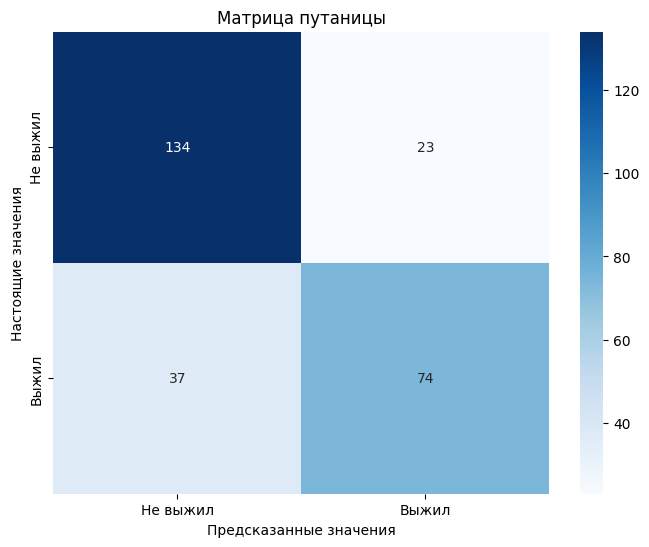

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Предсказания
y_pred = rf.predict(X_test)

# Матрица путаницы
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Не выжил', 'Выжил'], yticklabels=['Не выжил', 'Выжил'])
plt.ylabel('Настоящие значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица путаницы')
plt.show()


**График зависимости (Partial Dependence Plot)**

## Cross-validation

In [39]:
data_corr.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Инициализируем модель случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Выполним кросс-валидацию с 5 фолдами
cv_scores = cross_val_score(rf, X, y, cv=5)

# Печатаем результаты
print(f"Оценки модели на каждом фолде: {cv_scores}")
print(f"Средняя точность модели: {cv_scores.mean()}")

# y_pred_rf = rf.predict(X_test)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
#print(f'Accuracy случайного леса: {accuracy_rf}')

Оценки модели на каждом фолде: [0.79888268 0.78089888 0.79213483 0.75842697 0.7752809 ]
Средняя точность модели: 0.7811248509195907


## GridSearchCV

### Шаги:
1. Определение гиперпараметров, которые будут тестироваться.
2. Применение GridSearchCV для выбора наилучшей модели.
3. Доступ к лучшей модели после кросс-валидации.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Инициализируем модель случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Определяем гиперпараметры для поиска
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Инициализируем GridSearchCV с 5-fold кросс-валидацией
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучаем модели с разными гиперпараметрами
grid_search.fit(X, y)

# Получим лучшую модель
best_model = grid_search.best_estimator_

# Печатаем лучшие гиперпараметры
print(f"Лучшие параметры: {grid_search.best_params_}")

# Печатаем точность наилучшей модели
print(f"Лучшая точность: {grid_search.best_score_}")

# Теперь можем использовать best_model для предсказаний
y_pred = best_model.predict(X)

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Лучшая точность: 0.7822421693553449


## RandomizedSearchCV

In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Инициализируем RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Обучаем модель
random_search.fit(X, y)

# Лучшая модель
best_random_model = random_search.best_estimator_

# Выводим результаты
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучшая точность: {random_search.best_score_}")


Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}
Лучшая точность: 0.7800012554139728
